In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
df = pd.read_csv("dataset/feature_files/review_body-word2vec5-111909-512-nolda.csv")
rating = df["star_rating"]
df = df.drop(columns=["helpful_votes", "total_votes", "helpful_product", "star_rating"])

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.288502,-0.481055,0.258424,0.362731,0.475364,0.421039,0.014504,0.213545,-0.390066,0.103808,...,0.193389,-0.345230,-0.041291,0.063343,-0.230869,-0.018990,-0.462915,-0.762691,0.271782,-0.653218
1,0.173821,-0.214929,-0.098004,0.432866,0.370673,0.000804,-0.735449,0.162931,0.113988,0.468011,...,0.133606,-0.374622,-0.360892,-0.394297,-0.168498,-0.262506,-0.958892,0.099089,0.487517,-0.307144
2,-0.257559,-0.065606,0.344815,0.411276,0.090839,0.738248,0.282006,0.331116,-0.213441,0.092032,...,0.273857,-0.094201,0.245259,0.438028,-0.413395,0.425271,-0.417884,-0.886485,0.458968,-0.380352
3,-0.023537,0.186004,-0.018319,0.046002,0.285380,0.824158,0.240865,0.177934,-0.293685,0.369762,...,0.076834,0.171872,0.258420,0.169574,-0.280809,0.322120,-0.102916,-0.606135,0.186568,-0.477317
4,-0.832218,0.451893,0.474038,-0.018249,-0.478648,0.178108,-0.472869,-0.532138,-0.491469,-0.466011,...,0.594541,-0.302686,-0.511276,-0.590193,0.299716,-0.181081,-0.436865,0.996631,0.330113,-0.327735


In [22]:
rating.head()

0    5
1    5
2    5
3    5
4    3
Name: star_rating, dtype: int64

In [23]:
model = Sequential()

model.add(Dense(384, input_shape=(df.shape[1],), kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(384, kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='relu'))
model.add(Activation('softmax'))
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 384)               196992    
_________________________________________________________________
batch_normalization_3 (Batch (None, 384)               1536      
_________________________________________________________________
activation_4 (Activation)    (None, 384)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 384)               147840    
_________________________________________________________________
batch_normalization_4 (Batch (None, 384)               1536      
_________________________________________________________________
activation_5 (Activation)    (None, 384)               0         
__________

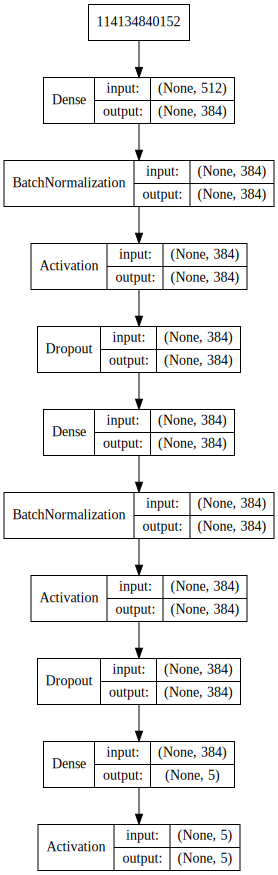

In [25]:
SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [26]:
# one hot encode rating
print(rating.shape)
print(type(rating))
y = OneHotEncoder().fit_transform(rating.values.reshape(len(rating), 1)).toarray()
y

(111909,)
<class 'pandas.core.series.Series'>


/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df, y, random_state=1)

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
network_history = model.fit(x_train, y_train,
                      batch_size=128,
                      epochs=50,
                      verbose=1,
                      validation_split=0.2,
                      callbacks=[early_stop])

Train on 67144 samples, validate on 16787 samples
Epoch 1/50
67144/67144 [==============================] - 20s 294us/step - loss: 1.1566 - acc: 0.5786 - val_loss: 1.0003 - val_acc: 0.6328
Epoch 2/50
67144/67144 [==============================] - 15s 231us/step - loss: 1.0118 - acc: 0.6214 - val_loss: 0.9524 - val_acc: 0.6458
Epoch 3/50
67144/67144 [==============================] - 14s 206us/step - loss: 0.9751 - acc: 0.6328 - val_loss: 0.9382 - val_acc: 0.6488
Epoch 4/50
67144/67144 [==============================] - 14s 213us/step - loss: 0.9566 - acc: 0.6385 - val_loss: 0.9220 - val_acc: 0.6522
Epoch 5/50
67144/67144 [==============================] - 17s 252us/step - loss: 0.9422 - acc: 0.6433 - val_loss: 0.9127 - val_acc: 0.6567
Epoch 6/50
67144/67144 [==============================] - 14s 214us/step - loss: 0.9316 - acc: 0.6467 - val_loss: 0.9081 - val_acc: 0.6560
Epoch 7/50
67144/67144 [==============================] - 15s 222us/step - loss: 0.9221 - acc: 0.6501 - val_loss: 0.

In [29]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))


27978/27978 [==============================] - 3s 112us/step
Accuracy: 66.61%


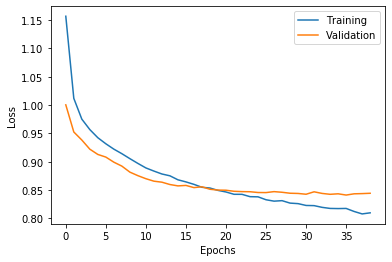

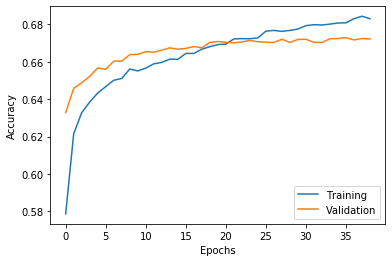

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

In [31]:
y_predict = model.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
y_predict

array([[5.51184930e-04, 5.51184930e-04, 4.88461833e-03, 1.09215736e-01,
        8.84797275e-01],
       [4.42966186e-02, 1.49234310e-02, 2.06122883e-02, 7.14869723e-02,
        8.48680735e-01],
       [1.24653541e-02, 1.24653541e-02, 5.50638661e-02, 4.06050056e-01,
        5.13955295e-01],
       ...,
       [8.96837376e-03, 8.96837376e-03, 1.47028696e-02, 6.27649903e-01,
        3.39710504e-01],
       [7.44049437e-04, 8.03789939e-04, 1.14739975e-02, 1.16189353e-01,
        8.70788813e-01],
       [3.98871303e-02, 1.20315813e-01, 3.05781424e-01, 1.91824928e-01,
        3.42190742e-01]], dtype=float32)

In [34]:
y_predict_df = pd.DataFrame(y_predict)
y_predict_df.head()

,0,1,2,3,4
0,0.000551,0.000551,0.004885,0.109216,0.884797
1,0.044297,0.014923,0.020612,0.071487,0.848681
2,0.012465,0.012465,0.055064,0.406050,0.513955
3,0.001217,0.001217,0.015870,0.181987,0.799709
4,0.820934,0.102687,0.044084,0.016147,0.016147


In [35]:
y_predict_unencoded = [row.idxmax() + 1 for index, row in y_predict_df.iterrows()]

In [36]:
y_test_df = pd.DataFrame(y_test)
y_test_unencoded = [row.idxmax() + 1 for index, row in y_test_df.iterrows()]

In [37]:
confusion_matrix(y_test_unencoded, y_predict_unencoded)

array([[ 3188,   150,   220,    73,   244],
       [  954,   157,   323,   182,   271],
       [  569,   185,   598,   575,   633],
       [  268,    87,   375,  1170,  2737],
       [  372,    70,   232,   821, 13524]])

In [38]:
print(classification_report(y_test_unencoded, y_predict_unencoded))

              precision    recall  f1-score   support

           1       0.60      0.82      0.69      3875
           2       0.24      0.08      0.12      1887
           3       0.34      0.23      0.28      2560
           4       0.41      0.25      0.31      4637
           5       0.78      0.90      0.83     15019

    accuracy                           0.67     27978
   macro avg       0.47      0.46      0.45     27978
weighted avg       0.62      0.67      0.63     27978



In [39]:
model.save("models/word2vec-512-2layer-384neurons.h5")